## Basic-Usage: Event-wise DL1 reading with stage1 data

The DL1DataReaderSTAGE1 is a class supporting event-wise reading from the DL1 stage1 format.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dl1_data_handler.reader import DL1DataReaderSTAGE1

#### LST1 Reader (example)

example_identifiers = [[ 0  7  0  1]
 [ 0 12  1  1]
 [ 0 19  2  1]]
pyIRFSimulatedEventsInfo = SimulatedEventsInfo(n_showers=1000, energy_min=0.003 TeV, energy_max=330.00 TeV, spectral_index=-2.0, max_impact=1400.00 m, viewcone=0.0 deg)
example_description = [{'name': 'image', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'image', 'shape': (110, 110, 3), 'dtype': dtype('float32')}, {'name': 'parameters', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'parameters', 'shape': (2,), 'dtype': dtype('float32')}, {'name': 'true_energy', 'tel_type': None, 'base_name': 'true_energy', 'shape': (), 'dtype': dtype('float64')}, {'name': 'true_alt', 'tel_type': None, 'base_name': 'true_alt', 'shape': (), 'dtype': dtype('float64')}, {'name': 'true_az', 'tel_type': None, 'base_name': 'true_az', 'shape': (), 'dtype': dtype('float64')}]
number of examples = 3
Event nr. 1
Parameters: [117.76852    -0.1607323]
true_energy: 0.037878841161727905
true_alt: 69.99999967119774
true_az: 359.999982697156


/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


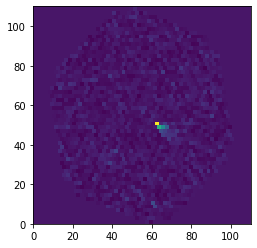

/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


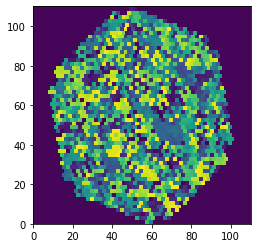

/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


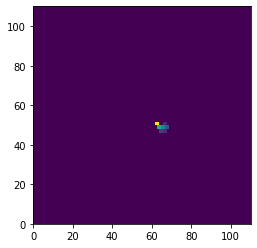

Event nr. 2
Parameters: [108.89185     -0.16679771]
true_energy: 0.008114906027913094
true_alt: 69.99999967119774
true_az: 359.999982697156


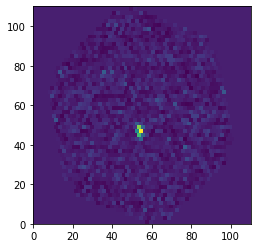

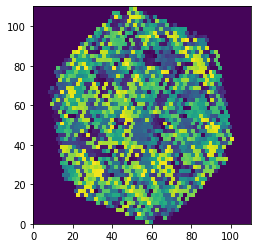

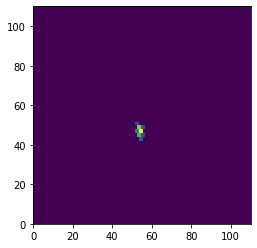

Event nr. 3
Parameters: [1.7830417e+03 8.0209665e-02]
true_energy: 0.40751269459724426
true_alt: 69.99999967119774
true_az: 359.999982697156


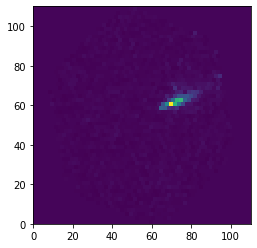

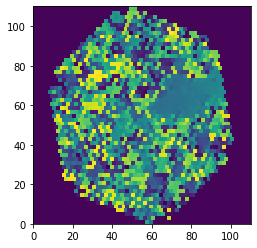

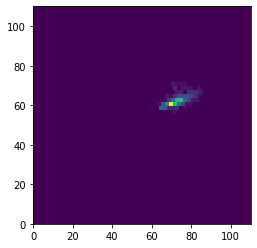

In [2]:
LST1_reader = DL1DataReaderSTAGE1(['/Users/tmiener/Desktop/dl1-data-handler/data/gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.h5'],
                                 mode='mono',
                                 example_identifiers_file="./examples.h5",
                                 selected_telescope_types=["LST_LST_LSTCam"],
                                 selected_telescope_ids = {"LST_LST_LSTCam": [1]},
                                 image_channels = ['image', 'peak_time', 'image_mask'],
                                 parameter_list = ['hillas_intensity', 'hillas_x'],
                                 event_info = ["true_energy", "true_alt", "true_az"])

print("example_identifiers = {}".format(LST1_reader.example_identifiers))
print("pyIRFSimulatedEventsInfo = {}".format(LST1_reader.pyIRFSimulatedEventsInfo))
print("example_description = {}".format(LST1_reader.example_description))
print("number of examples = {}".format(LST1_reader.__len__()))
NUM_IMAGES_TO_PLOT = LST1_reader.__len__()
i = 0
while i < NUM_IMAGES_TO_PLOT:
    example = LST1_reader[i]
    image = example[0]
    print("Event nr. {}".format(i+1))
    print("Parameters: {}".format(example[1]))
    print("true_energy: {}".format(example[2]))
    print("true_alt: {}".format(example[3]))
    print("true_az: {}".format(example[4]))
    plt.figure()
    #image charge
    plt.pcolor(image[:,:,0],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    #peak time
    plt.pcolor(image[:,:,1],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    #cleaned image charge
    plt.pcolor(image[:,:,2],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    i+=1


example_identifiers = [(0, 19, 4, 2), (0, 7, 0, 4), (0, 19, 2, 1), (0, 8, 2, 3), (0, 12, 1, 1), (0, 13, 3, 2), (0, 13, 5, 4), (0, 19, 5, 3), (0, 7, 0, 1), (0, 12, 2, 2), (0, 19, 6, 4)]
pyIRFSimulatedEventsInfo = SimulatedEventsInfo(n_showers=1000, energy_min=0.003 TeV, energy_max=330.00 TeV, spectral_index=-2.0, max_impact=1400.00 m, viewcone=0.0 deg)
example_description = [{'name': 'image', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'image', 'shape': (110, 110, 1), 'dtype': dtype('float32')}, {'name': 'parameters', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'parameters', 'shape': (2,), 'dtype': dtype('float32')}, {'name': 'obs_id', 'tel_type': None, 'base_name': 'obs_id', 'shape': (), 'dtype': dtype('int32')}, {'name': 'event_id', 'tel_type': None, 'base_name': 'event_id', 'shape': (), 'dtype': dtype('int64')}]
number of examples = 11
Event nr. 1
Parameters: [0.        1.9428575]
obs_id: 1
event_id: 10000


/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


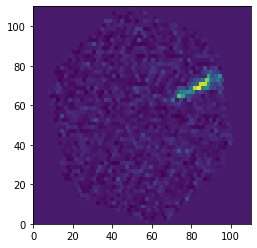

Event nr. 2
Parameters: [0.         0.24581186]
obs_id: 1
event_id: 3002


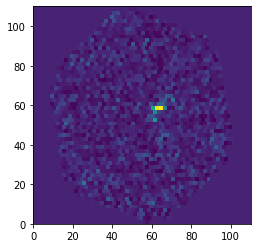

Event nr. 3
Parameters: [0.        0.7481595]
obs_id: 1
event_id: 10000


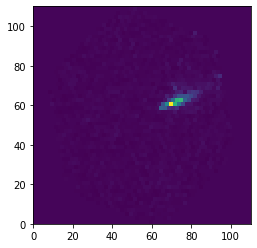

Event nr. 4
Parameters: [0.         0.80371743]
obs_id: 1
event_id: 3005


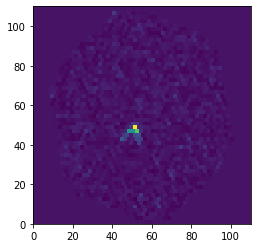

Event nr. 5
Parameters: [0.        0.6474015]
obs_id: 1
event_id: 7205


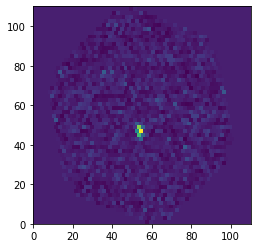

Event nr. 6
Parameters: [0.       2.140597]
obs_id: 1
event_id: 8605


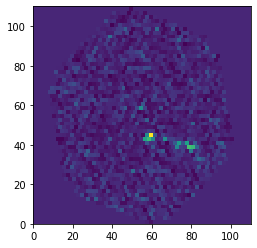

Event nr. 7
Parameters: [0.         0.35423708]
obs_id: 1
event_id: 8605


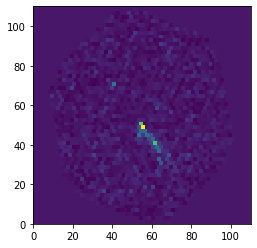

Event nr. 8
Parameters: [0.        2.3647428]
obs_id: 1
event_id: 10000


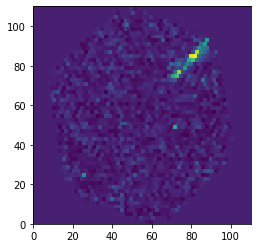

Event nr. 9
Parameters: [0.         0.31016135]
obs_id: 1
event_id: 3002


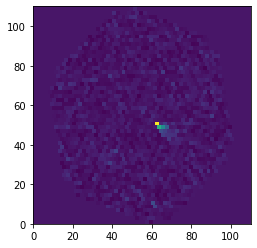

Event nr. 10
Parameters: [0.         0.03695037]
obs_id: 1
event_id: 7205


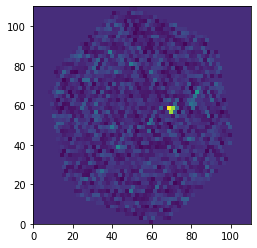

Event nr. 11
Parameters: [0.        1.3072817]
obs_id: 1
event_id: 10000


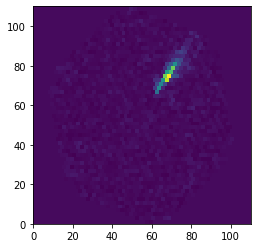

In [3]:
event_selection = [{'col_name': "true_energy", 'max_value': 0.5, 'min_value':0.001}, {'col_name': "hillas_intensity", 'min_value':10.0}]


LSTs_monotrigger_reader = DL1DataReaderSTAGE1(['/Users/tmiener/Desktop/dl1-data-handler/data/gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.h5'],
                                             mode='mono',
                                             selected_telescope_types=["LST_LST_LSTCam"],
                                             image_channels = ['image'],
                                             parameter_list = ['leakage_intensity_width_2', 'peak_time_std'],
                                             event_selection = event_selection, #PyTables.where() string for the events table
                                             event_info = ["obs_id", "event_id"],
                                             shuffle=True,
                                             seed=5678)

print("example_identifiers = {}".format(LSTs_monotrigger_reader.example_identifiers))
print("pyIRFSimulatedEventsInfo = {}".format(LSTs_monotrigger_reader.pyIRFSimulatedEventsInfo))
print("example_description = {}".format(LSTs_monotrigger_reader.example_description))
print("number of examples = {}".format(LSTs_monotrigger_reader.__len__()))
NUM_IMAGES_TO_PLOT = LSTs_monotrigger_reader.__len__()
i = 0
while i < NUM_IMAGES_TO_PLOT:
    example = LSTs_monotrigger_reader[i]
    image = example[0]
    print("Event nr. {}".format(i+1))
    print("Parameters: {}".format(example[1]))
    print("obs_id: {}".format(example[2]))
    print("event_id: {}".format(example[3]))
    plt.figure()
    #image charge
    plt.pcolor(image[:,:,0],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    i+=1


example_identifiers = [(0, 0, [array([-1, -1, -1,  0], dtype=int32)]), (0, 3, [array([-1,  0, -1, -1], dtype=int32)]), (0, 4, [array([-1, -1, -1,  1], dtype=int32)]), (0, 6, [array([-1,  1, -1, -1], dtype=int32)]), (0, 10, [array([-1, -1,  0, -1], dtype=int32)]), (0, 16, [array([-1, -1,  1, -1], dtype=int32)]), (0, 17, [array([-1, -1, -1,  2], dtype=int32)]), (0, 19, [array([ 0, -1,  2, -1], dtype=int32)])]
pyIRFSimulatedEventsInfo = SimulatedEventsInfo(n_showers=1000, energy_min=0.003 TeV, energy_max=330.00 TeV, spectral_index=-2.0, max_impact=1400.00 m, viewcone=0.0 deg)
example_description = [{'name': 'MST_MST_FlashCam_triggers', 'tel_type': 'MST_MST_FlashCam', 'base_name': 'triggers', 'shape': (4,), 'dtype': dtype('int8')}, {'name': 'MST_MST_FlashCam_images', 'tel_type': 'MST_MST_FlashCam', 'base_name': 'images', 'shape': (4, 112, 112, 2), 'dtype': dtype('float32')}, {'name': 'MST_MST_FlashCam_parameters', 'tel_type': 'MST_MST_FlashCam', 'base_name': 'parameters', 'shape': (4, 2), 

/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


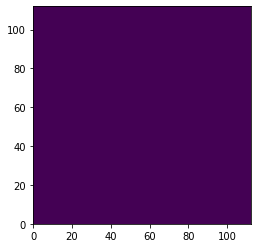

/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


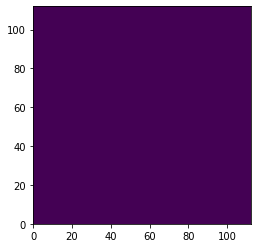

/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


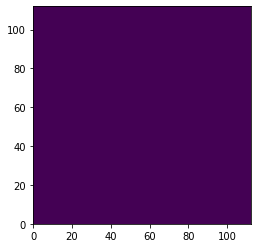

/Users/tmiener/opt/anaconda3/envs/subclass/lib/python3.7/site-packages/ipykernel-5.4.3-py3.7.egg/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


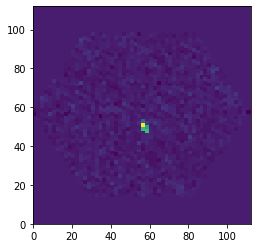

Event nr. 2
Trigger info: [0 1 0 0]
Parameters: [[       nan        nan]
 [-2.2434628 11.63496  ]
 [       nan        nan]
 [       nan        nan]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


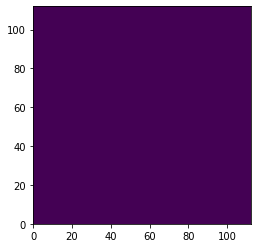

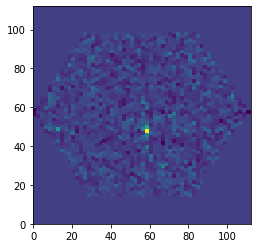

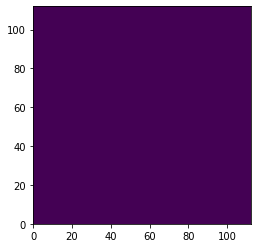

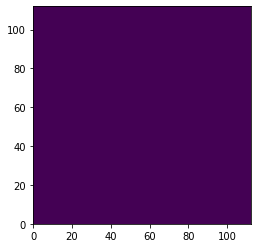

Event nr. 3
Trigger info: [0 0 0 1]
Parameters: [[      nan       nan]
 [      nan       nan]
 [      nan       nan]
 [7.7440424 6.975053 ]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


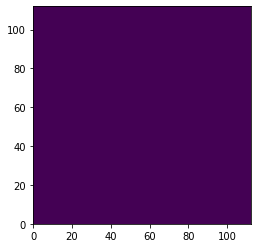

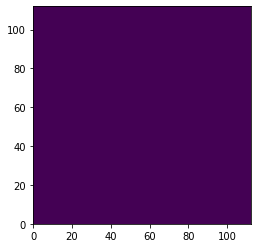

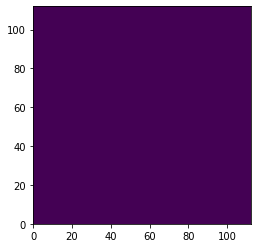

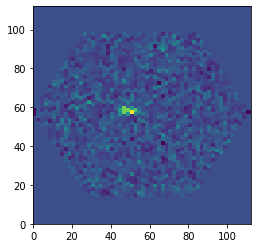

Event nr. 4
Trigger info: [0 1 0 0]
Parameters: [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


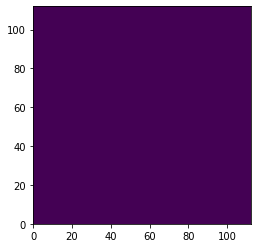

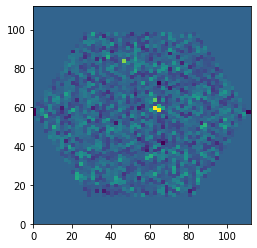

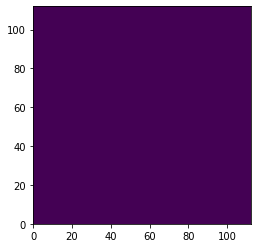

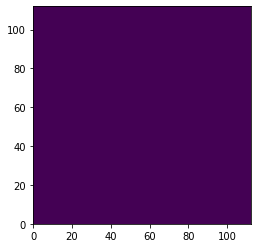

Event nr. 5
Trigger info: [0 0 1 0]
Parameters: [[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


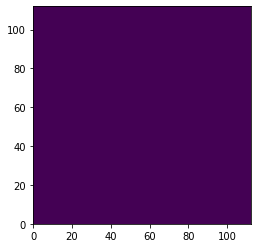

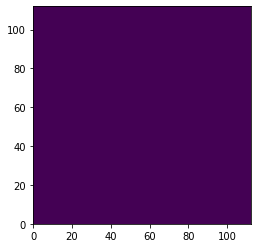

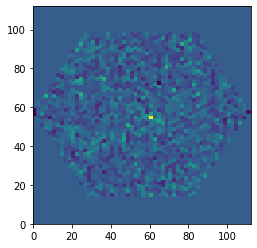

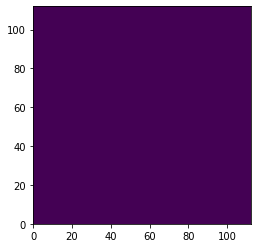

Event nr. 6
Trigger info: [0 0 1 0]
Parameters: [[       nan        nan]
 [       nan        nan]
 [-2.6863153  6.1566405]
 [       nan        nan]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


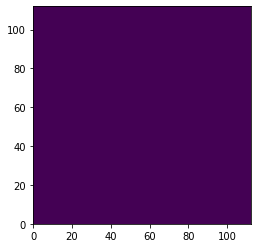

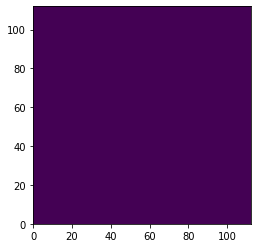

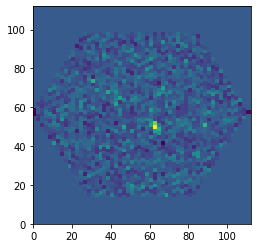

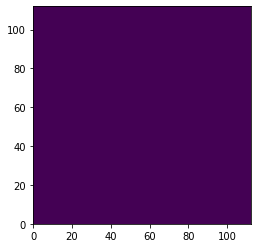

Event nr. 7
Trigger info: [0 0 0 1]
Parameters: [[      nan       nan]
 [      nan       nan]
 [      nan       nan]
 [ 9.40794  15.225796]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


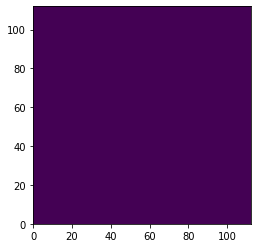

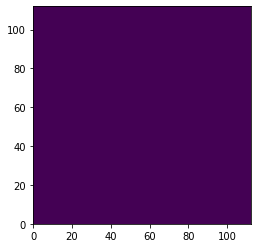

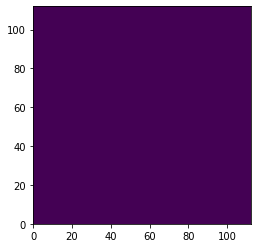

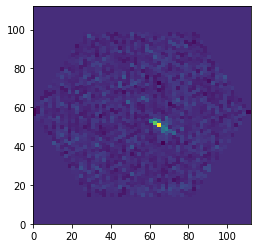

Event nr. 8
Trigger info: [1 0 1 0]
Parameters: [[11.80143  43.19599 ]
 [      nan       nan]
 [-7.331787 12.892937]
 [      nan       nan]]
pos_x: [-160. -310. -330.   70.]
pos_y: [-230.  165. -200. -460.]
pos_z: [60. 48. 39. 73.]


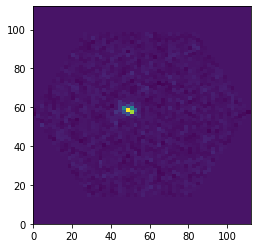

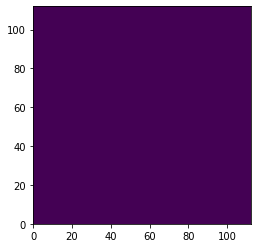

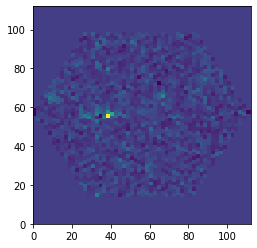

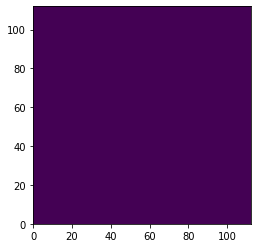

In [4]:
LSTs_stereo_Multcut_reader = DL1DataReaderSTAGE1(['/Users/tmiener/Desktop/dl1-data-handler/data/gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.h5'],
                                                 mode='stereo',
                                                 selected_telescope_types=["MST_MST_FlashCam"],
                                                 #selected_telescope_types=["LST_LST_LSTCam"],
                                                 selected_telescope_ids = {"MST_MST_FlashCam": [51,52,55,56]},
                                                 multiplicity_selection={"MST_MST_FlashCam": 1, "LST_LST_LSTCam": 4},
                                                 image_channels = ['image', 'image_mask'],
                                                 parameter_list = ['timing_slope', 'intensity_std'],
                                                 subarray_info = ["pos_x","pos_y","pos_z"])

print("example_identifiers = {}".format(LSTs_stereo_Multcut_reader.example_identifiers))
print("pyIRFSimulatedEventsInfo = {}".format(LSTs_stereo_Multcut_reader.pyIRFSimulatedEventsInfo))
print("example_description = {}".format(LSTs_stereo_Multcut_reader.example_description))
print("number of examples = {}".format(LSTs_stereo_Multcut_reader.__len__()))
NUM_IMAGES_TO_PLOT = LSTs_stereo_Multcut_reader.__len__()
i = 0
while i < NUM_IMAGES_TO_PLOT:
    example = LSTs_stereo_Multcut_reader[i]
    image = example[1]
    print("Event nr. {}".format(i+1))
    print("Trigger info: {}".format(example[0]))
    print("Parameters: {}".format(example[2]))
    print("pos_x: {}".format(example[3]))
    print("pos_y: {}".format(example[4]))
    print("pos_z: {}".format(example[5]))

    plt.figure()
    #cleaned image charge LST1
    plt.pcolor(image[0,:,:,0],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    #cleaned image charge LST2
    plt.pcolor(image[1,:,:,0],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    #cleaned image charge LST3
    plt.pcolor(image[2,:,:,0],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    #cleaned image charge LST4
    plt.pcolor(image[3,:,:,0],cmap='viridis')
    plt.axes().set_aspect('equal')
    plt.show()
    plt.close()
    i+=1


In [5]:
MultiStereo_reader = DL1DataReaderSTAGE1(['/Users/tmiener/Desktop/dl1-data-handler/data/gamma_20deg_0deg_run1___cta-prod5-lapalma_desert-2158m-LaPalma-dark_100evts.h5'],
                                         mode='stereo',
                                         selected_telescope_types=["LST_LST_LSTCam", "MST_MST_FlashCam"],
                                         selected_telescope_ids = {"MST_MST_FlashCam": [51,52,55]},
                                         multiplicity_selection={"Subarray": 5}, # Subarray multiplicity cut. 5 telescopes have to trigger in the subarray.
                                         parameter_list = ['hillas_intensity', 'hillas_x'],
                                         event_info = ["true_energy", "true_alt", "true_az"])

print("example_identifiers = {}".format(MultiStereo_reader.example_identifiers))
print("pyIRFSimulatedEventsInfo = {}".format(MultiStereo_reader.pyIRFSimulatedEventsInfo))
print("example_description = {}".format(MultiStereo_reader.example_description))
print("number of examples = {}".format(MultiStereo_reader.__len__()))
NUM_IMAGES_TO_PLOT = MultiStereo_reader.__len__()
i = 0
while i < NUM_IMAGES_TO_PLOT:
    example = MultiStereo_reader[i]
    print("Event nr. {}".format(i+1))
    print("Example: {}".format(example))
    i+=1



example_identifiers = [(0, 19, [array([2, 4, 5, 6], dtype=int32), array([ 0, -1,  2], dtype=int32)])]
pyIRFSimulatedEventsInfo = SimulatedEventsInfo(n_showers=1000, energy_min=0.003 TeV, energy_max=330.00 TeV, spectral_index=-2.0, max_impact=1400.00 m, viewcone=0.0 deg)
example_description = [{'name': 'LST_LST_LSTCam_triggers', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'triggers', 'shape': (4,), 'dtype': dtype('int8')}, {'name': 'LST_LST_LSTCam_parameters', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'parameters', 'shape': (4, 2), 'dtype': dtype('float32')}, {'name': 'MST_MST_FlashCam_triggers', 'tel_type': 'MST_MST_FlashCam', 'base_name': 'triggers', 'shape': (3,), 'dtype': dtype('int8')}, {'name': 'MST_MST_FlashCam_parameters', 'tel_type': 'MST_MST_FlashCam', 'base_name': 'parameters', 'shape': (3, 2), 'dtype': dtype('float32')}, {'name': 'true_energy', 'tel_type': None, 'base_name': 'true_energy', 'shape': (), 'dtype': dtype('float64')}, {'name': 'true_alt', 'tel_type': None, 'base_